<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Loading and Describing Data 

_Authors: Matt Brems (DC)_

---

In this lab you will practice loading data using python and describing it with statistics.

It might be a good idea to first check the [source of the Boston housing data](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/UCI%20Machine%20Learning%20Repository_%20Housing%20Data%20Set.pdf).

### 1. Load the boston housing data (provided)

In [3]:
# Download the data and save to a file called "housing.data."
import seaborn as sns
import urllib
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

In [9]:
# this saves a file called 'housing.data' locally'
urllib.request.urlretrieve(data_url, '../datasets/housing.data')

('../datasets/housing.data', <http.client.HTTPMessage at 0x1a10f42cc0>)

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for your convenience. You may choose to edit the names, should you decide it would be more helpful to do so.

In [8]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [3]:
# 1. CRIM      - per capita crime rate by town
# 2. ZN        - proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. INDUS     - proportion of non-retail business acres per town
# 4. CHAS      - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# 5. NOX       - nitric oxides concentration (parts per 10 million)
# 6. RM        - average number of rooms per dwelling
# 7. AGE       - proportion of owner-occupied units built prior to 1940
# 8. DIS       - weighted distances to five Boston employment centres
# 9. RAD       - index of accessibility to radial highways
# 10. TAX      - full-value property-tax rate per 10,000 dollars. 
# 11. PTRATIO  - pupil-teacher ratio by town
# 12. B        - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 13. LSTAT    - Percent lower status of the population
# 14. MEDV     - Median value of owner-occupied homes in $1000's

### 2. Load the `housing.data` file with python

Using any method of your choice.
> _**Hint:** despite this file having a strange `.data` extension, using python's `open() as file` and `file.read()` or `file.readlines()` we can load this in and see that it is a text file formatted much the same as a CSV. You can use string operations to format the data._

In [11]:
# Reading in the local file 'housing.data'
data = []
with open('../datasets/housing.data', 'r') as f:
    rows = f.readlines()
    for row in rows:
        row = [float(x) for x in row.split()]
        data.append(row)
f.close()

In [39]:
# Alternative approach
data = []
with open('../datasets/housing.data', 'r') as f:
    data = [[float(x) for x in row.split()] for row in f.readlines()]
f.close()

In [41]:
# look at the first two rows:
data[0]

[0.00632,
 18.0,
 2.31,
 0.0,
 0.538,
 6.575,
 65.2,
 4.09,
 1.0,
 296.0,
 15.3,
 396.9,
 4.98,
 24.0]

In [42]:
data[1]

[0.02731,
 0.0,
 7.07,
 0.0,
 0.469,
 6.421,
 78.9,
 4.9671,
 2.0,
 242.0,
 17.8,
 396.9,
 9.14,
 21.6]

In [43]:
# put the data into a dictionary with keys identified by column names:
d = {key_name:[row[index] for row in data] for index, key_name in enumerate(names)}

In [44]:
d['NOX'][:10]

[0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524, 0.524]

In [45]:
print(d.keys())

dict_keys(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])


### 3.  Conduct a brief integrity check of your data. 

This integrity check should include, but is not limited to, checking for missing values and making sure all values make logical sense. (i.e. is one variable a percentage, but there are observations above 100%?)

Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

In [17]:
# Checking for features with improperly recorded observations:
    
# Given the information about the features and observing a few of their 
# observations I believe there are 7 features which take place on a 
# normalized scale (0-1 or 0-100)

# - CHAS (0-1),
# - CRIM(0-100),
# - ZN(0-100), 
# - INDUS(0-100), 
# - RM(0-100), 
# - LSTAT(0-100), 
# - PTRATIO(0-100)

In [17]:
max_one = ['CHAS']
max_hund = ['ZN','INDUS','RM','LSTAT','PTRATIO', 'CRIM']

In [21]:
for feature in max_one:
    for observation in d[feature]:
        if (observation > 1) or (observation < 0):
            print('Abnormal Value found in {}  with value of {}'.format(feature,observation))
# if nothing is returned than nothing unusual was found.

In [22]:
for feature in max_hund:
    for observation in d[feature]:
        if (observation > 100) or (observation < 0):
            print('Abnormal Value found in {}  with value of {}'.format(feature,observation))
# Also returned no values

In [25]:
# printing how many features we should have
print('Number of Expected Features: {}'.format(len(names)))

# printing how many features we do have (keys)
print('Number of Actual Features: {}'.format(len(d.keys())))

# prints the lengths of all the value lists in the dictionary
for key, data in d.items():
    print("{} rows in {}".format(len(data), key))

Number of Expected Features: 14
Number of Actual Features: 14
506 rows in CRIM
506 rows in ZN
506 rows in INDUS
506 rows in CHAS
506 rows in NOX
506 rows in RM
506 rows in AGE
506 rows in DIS
506 rows in RAD
506 rows in TAX
506 rows in PTRATIO
506 rows in B
506 rows in LSTAT
506 rows in MEDV


 _There is no missing data and there are no other data integrity issues that we checked for._

### 4. For what two attributes does it make the *least* sense to calculate mean and median? Why?


**Potential Solution: **_The dummy variable `CHAS` and the categorical variable `RAD`. _
- `CHAS` is a dummy (categorical) variable that makes no sense quantitatively. 
- `RAD` is a variable that indexes the distance to highways. It has many low values and, after a large gap, has higher values. It stands to reason that this is not a "_true_" quantitative variable in the sense that the difference between `RAD = 1` and `RAD = 2` may not be the same as the difference between `RAD = 2` and `RAD = 3`.

### 5. Which two variables have the strongest linear association? 

Report both variables, the metric you chose as the basis for your comparison, and the value of that metric. *(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*

In [27]:
import numpy as np

relationships = []

# Choosing to use the pearson correlation coefficient, "np.corrcoef":
for name1 in d.keys():
    # do not consider RAD or CHAS:
    if name1 not in ['RAD','CHAS']:
        for name2 in d.keys():
            if (name1 != name2) and (name2 not in ['RAD','CHAS']):
                relationships.append([name1, name2, np.corrcoef(d[name1], d[name2])[0,1]])

In [28]:
# we're interested both in the magnitude of the relationship, 
# not the sign (positive or negative) of it

sort_rel = sorted(relationships, 
                  key=lambda x: np.abs(x[2]), 
                  reverse=True)

In [30]:
for i in range(5):
    print(sort_rel[i])

['NOX', 'DIS', -0.7692301132258278]
['DIS', 'NOX', -0.7692301132258278]
['INDUS', 'NOX', 0.7636514469209147]
['NOX', 'INDUS', 0.7636514469209147]
['AGE', 'DIS', -0.7478805408686319]


**Solution:** _`NOX` (Nitric Oxides Concentration) and `DIS` (Weighted Distances to Five Boston Employment Centers) have the strongest _linear_ association. The correlation between NOX and DIS is -0.769.

### 6. Look at distributional qualities of variables.

Answer the following questions:
1. Which variable has the most symmetric distribution? 
2. Which variable has the most left-skewed (negatively skewed) distribution? 
3. Which variable has the most right-skewed (positively skewed) distribution? 

Defend your method for determining this.

In [31]:
# Symmetric: the metric with the smallest abs(mean - median)
symmetric = sorted([[key_name, np.abs(np.mean(values) - np.median(values))] for key_name,values in d.items()],
                   key=lambda x: x[1])
print ('Symmetric:', symmetric[0])


# Left: the metric with the smallest (or more nagative) mean - median
left = sorted([[k, np.mean(v) - np.median(v)] for k,v in d.items()],
              key=lambda x: x[1])
print ('Left:', left[0])

# Right: the metric with the largest mean - median
right = sorted([[k, np.mean(v) - np.median(v)] for k,v in d.items()],
               key=lambda x: x[1], 
               reverse=True)
print ('Right:', right[0])

Symmetric: ['NOX', 0.01669505928853754]
Left: ['B', -34.765968379446576]
Right: ['TAX', 78.23715415019763]


### 8. Repeat question 6 but scale the variables by their range first.

As you may have noticed, the spread of the distribution contributed significantly to the results in question 6.

In [50]:
#ptp = peak to peak
def scaled_diff(v):
    return (np.mean(v) - np.median(v))/np.ptp(v)

symmetric = sorted([[k, np.abs(scaled_diff(v))] for k,v in d.items()],
                   key=lambda x: x[1])
print ('Symmetric:', symmetric[0])

left = sorted([[k, scaled_diff(v)] for k,v in d.items()],
              key=lambda x: x[1])
print ('Left:', left[0])

right = sorted([[k, scaled_diff(v)] for k,v in d.items()],
               key=lambda x: x[1], reverse=True)
print ('Right:', right[0])

Symmetric: ['RM', 0.01458792629848224]
Left: ['AGE', -0.09191656863263897]
Right: ['RAD', 0.19780030933150025]


### 9. Univariate analysis of your choice

Conduct a full univariate analysis on MEDV, CHAS, TAX, and RAD. 

For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics.
- A measure of central tendency
- A measure of spread
- A description of the shape of the distribution (plot or metric based)

If you feel there is additional information that is relevant, include it. 

---
_**Sketch of Answer:**_   
You should report at least one **measure of center**, one **measure of spread**, and a description (metric-based or plot-based) of the shape of the **distribution** of each variable.  
- Defending which of these choices is better. (i.e. median is a better measure of center than mean because...) 
- Including multiple measures of center and/or spread and interpreting what these reveal about the distribution of a variable is especially good.
- Including a plot that goes along with these metrics and this description would turn this answer from a "good" one into a "great" one. A report to a supervisor should ideally include these points.
---

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('fivethirtyeight')

In [33]:
def univariate_analysis(data):
    print('mean: {}'.format(np.mean(data)))
    print('median: {}'.format(np.median(data)))
    print('std: {}'.format(np.std(data)))
    print('Percentiles:')
    for p in range(0,100+1,10):
        print('{}) {}'.format(p, np.percentile(data, p)))
        
    data = data - np.mean(data)
    
    print('Percentiles (after centering):')
    for p in range(0,100+1,10):
        print('{}) {}'.format(p, np.percentile(data, p)))
        
    sns.distplot(data)
    plt.show()

-- MEDV ANALYSIS --
mean: 22.532806324110677
median: 21.2
std: 9.188011545278203
Percentiles:
0) 5.0
10) 12.75
20) 15.3
30) 18.2
40) 19.7
50) 21.2
60) 22.7
70) 24.15
80) 28.2
90) 34.8
100) 50.0
Percentiles (after centering):
0) -17.532806324110677
10) -9.782806324110677
20) -7.232806324110676
30) -4.332806324110678
40) -2.8328063241106776
50) -1.3328063241106776
60) 0.16719367588932244
70) 1.6171936758893235
80) 5.667193675889322
90) 12.267193675889324
100) 27.467193675889323


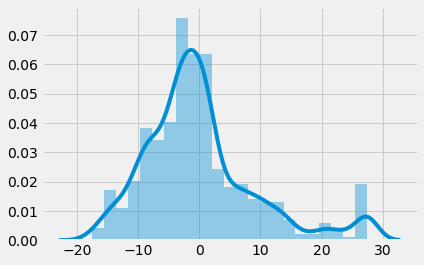

In [34]:
print('-- MEDV ANALYSIS --')
univariate_analysis(d['MEDV'])

-- CHAS ANALYSIS --
mean: 0.0691699604743083
median: 0.0
std: 0.2537429349603471
Percentiles:
0) 0.0
10) 0.0
20) 0.0
30) 0.0
40) 0.0
50) 0.0
60) 0.0
70) 0.0
80) 0.0
90) 0.0
100) 1.0
Percentiles (after centering):
0) -0.0691699604743083
10) -0.0691699604743083
20) -0.0691699604743083
30) -0.0691699604743083
40) -0.0691699604743083
50) -0.0691699604743083
60) -0.0691699604743083
70) -0.0691699604743083
80) -0.0691699604743083
90) -0.0691699604743083
100) 0.9308300395256917


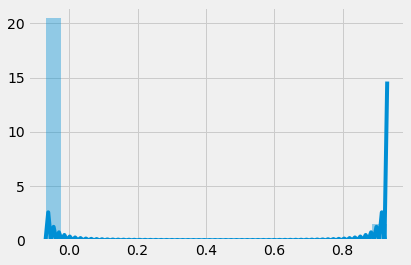

In [35]:
print('-- CHAS ANALYSIS --')
univariate_analysis(d['CHAS'])

### 10. Have you been using inferential statistics, descriptive statistics, or both?

For each exercise, identify the branch of statistics on which you relied for your answer.

**Solution:** _For all exercises, we relied only on descriptive statistics._

### 11. Reducing the number of observations

It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. 

**11.A Use the `random.sample()` function to select 50 observations from `'AGE'`.**

([This documentation](https://docs.python.org/2/library/random.html) may be helpful.)

In [36]:
age = d['AGE']

import random

age_sample = random.sample(age, 50)

In [38]:
print(len(age_sample))

50


**11.B Identify the type of sampling we just used.**

---
**Solution:** _Simple random sampling was used._  

---

### 12. [BONUS] Of the remaining types of sampling, describe (but do not execute) how you might implement at least one of these types of sampling.


**Potential Solution:** Stratified random sampling is a method used when we want to protect ourselves from a potentially "bad" or "skewed" simple random sample. The variable CHAS takes on two values: 1 and 0. Rather
than selecting 50 observations at random, we could look at the proportion of 1s and 0s for the CHAS variable, select 50 * (proportion of 1s) observations where CHAS = 1 and then select 50 * (proportion of 0s)
obervations where CHAS = 0.